In [1]:
%matplotlib inline

# 592B Spring 2018 Problem Set 4 due Tues 03/06 11.59PM

The purpose of this problem set is to be a review and to help you connect what we've been doing in this course with your background knowledge in phonetics. Therefore, the problem set has you use both Praat and the computational/mathematical tools we've been learning, to do the same operations. You'll be creating a number of audio files and image files in this problem set. Save them/write them to file in a directory in your problem set repository called `supp/` (for supplementary materials).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 
import scipy.fftpack as fftpack
import scipy.signal as signal
import librosa

from ipywidgets import interactive
from IPython.display import Audio, display

## Problem 1: A pure tone

1. In Praat, use `New > Sound > Create sound from formula` to create an audio file that is the signal $$ f_1(t) = 0.5 * sin(1220\pi t)  $$ sampled at 22050 Hz, with a duration of 1.5 seconds. Name your file `f1.wav` and make sure to include it in `supp/`.

---

**Solution:** See `f1.wav` in `supp/`. I can load it in and listen to it using the `Audio` command, too:

In [3]:
f1_praat, sr_praat = librosa.load("supp/f1.wav", sr = None)
# Or use scipy.io: 
# f1_praat, sr_praat = wavfile.read("supp/f1.wav")

print("The sampling rate of f1.wav is:", sr_praat, "Hz.")

display(Audio(data=f1_praat,rate = sr_praat))




The sampling rate of f1.wav is: 22050 Hz.


*Part 2.* In Praat, determine the period and the fundamental frequency of `f1` off of the waveform. Does this match what you see with the blue line f0 contour? It should. If not, explain why. Take a screenshot showing how you determined the period off of the waveform (it should show you determining the duration of one cycle of the waveform). Save the screenshot as `f1-wave.png` or some other image file, e.g., `f1-wave.jpg`, `f1-wave.gif`.

---

**Solution:** Here's a screenshot of determining the period off of the waveform:

![Screenshot of period determination of f1](supp/f1-wave.png)

Note that off of the waveform, we estimate the period of `f1` to be about 610 Hz. But the blue line tells us 305 Hz! Uh-oh, what's happened?

Let's check out the settings for the f0 range shown by going to `Pitch > Advanced Pitch Settings`:

![Settings for view range of f0](supp/f1-adv-pitch.png)

This shows us that the view range is automatically set to whatever the f0 range used for constraining Praat's f0 estimation algorithm is. (Note: if we set the max f0 here to 650 Hz, it doesn't help!) We can check the f0 range used for the f0 estimation by going to `Pitch > Pitch settings`:

![Settings for range of f0](supp/f1-pitch-500.png)

Oops, that's the problem! We were only allowing f0 candidates up to 500 Hz! After we increase the ceiling on f0 estimates to 650 Hz, we've fixed our problem: the blue line shows up at 610 Hz.

![The blue line is fixed](supp/f1-wave-2.png)

---

Part 3. In Praat, take the spectrum of `f1` over a portion of the signal, approximately 5 or 6 cycles. Determine the f0 of the signal using the spectrum, and explain how you did it. Why is there only a single peak in the spectrum?

---
**Solution:** This is a pure tone, so there is only a single component wave building up the complex wave, i.e., it's a pure tone! There's only a single peak in the spectrum because there is only one component frequency. The frequency where we see the peak must therefore be the fundamental frequency, and indeed the peak is at 610 Hz, as shown below.

![Spectrum of f1](supp/f1-spectrum.png)

---

Part 4. In Praat, examine the spectrogram of `f1`, at Praat's default settings for spectrograms. Explain why the spectrogram looks the way it does.

---

We set Praat to its default settings for `Spectrum > Spectrogram settings...` by clicking on `Standards`:

![Set spectrogram settings to default](supp/f1-spectro-settings.png)

We get a single dark band centered approximately around 610ish Hz, as shown below. That's because we have a single component frequency at 610ish Hz (610 Hz, to be exact). 


![Spectrogram for f1](supp/f1-spectro.png)

Now, why is this band so broad? It's because this is a wide-band spectrogram: higher temporal resolution, lower frequency resolution. You can see this also if you take a spectrum of our signal over just a couple cycles.

---

Part 5. In python, define the same signal `f1`, **but use a sampling rate of 2200 Hz to reduce the computational expense of the Fourier transform computation later**. Show how to compute $f0$ of the signal `f1` off of the mathematical formula for $f_1(t)$.

**Solution**: 
Recall that a standard definition of a sinusoidal signal (i.e., a sine wave) is given as function of time $t$:

$$y(t) = A \sin (\omega t + \phi) $$

where:
- $A$ is the amplitude
- $\omega$ is the angular frequency, n.b., $\omega = 2\pi f$ (where $f$ is the frequency in cycles per second (Hertz or Hz))
- $\phi$ is the phase shift 

Since we have 

$$ f_1(t) = 0.5 * sin(1220\pi t)  $$

that means that $\omega = 2\pi f = 1220\pi$. Therefore, 

$$ f = \frac{1220 \pi}{2 \pi} = \frac{1220}{2} = 610 Hz $$

And here's how we define this in Python:

In [4]:
fs = 2200 # Set up 2200 Hz sampling rate
t_start = 0; t_stop = 1.5 # 0 to 1.5 seconds
t = np.linspace(t_start, t_stop, int(fs*(t_stop-t_start)), endpoint=False)
f1 = 0.5*np.sin(1220*np.pi*t)

Part 6. In python, plot `f1` and set the x-limits so that you can determine the period of `f1` off of the plot. See that this period measurement matches your answers above.

---

**Solution:** We plot `f1` below. Note that it's pretty jagged and irregular due to the low sampling rate. But we can still see, for instance, that we've got two peaks: at the 1st sample and at the 8th sample (counting from 0). 


<Container object of 3 artists>

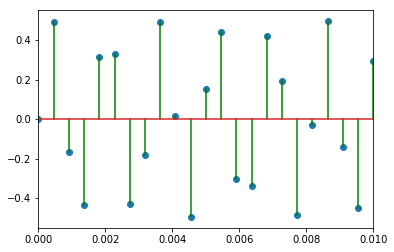

In [5]:
plt.figure("Plot of f1") # Create a new figure

plt.xlim(0,0.01)
#plt.plot(t, f1, "-r")
plt.stem(t , f1, "-g") 

So let's check what timepoints those are at. That looks like two periods, so we'll also have to divide the time interval between those peaks by two to get the period. It's not going to be exact, but it should be pretty close to 610 Hz. Why isn't it exact?

In [6]:
print(t[0]); print(t[8])
print("Two periods take about", 1000*(t[8]-t[0]), "ms.")
print("So one period is approx.", 1000/2*(t[8]-t[0]), "ms.")
print("The estimated f0 is 1/T=",1/((t[8]-t[0])/2), "Hz.")


0.0
0.00363636363636
Two periods take about 3.63636363636 ms.
So one period is approx. 1.81818181818 ms.
The estimated f0 is 1/T= 550.0 Hz.


---
*Part 7*. In python, create an Audio object from the defined `f1` signal and play it. Does it sound like your Praat f1 sound object?

**Solution: Yes, it still sounds like the Praat audio.**


In [7]:
display(Audio(data=f1,rate = fs))

*Part 8.* In python, create and plot the spectrum of `f1` using `fftpack.fft`. Compare it with the spectrum you saw in Praat and explain how and why it is both similar and different.

---
**Solution:** We compute the spectrum as shown below. It is similar to the spectrum in Praat in that it has a single component frequency showing at 610 Hz. However, there is both a positive and a negative frequency, so there's also a peak at -610 Hz. The peak is a single line at 610 Hz---it has no breadth like the peak in Praat. This is because we set up the FFT over the entire signal of 1.5s, so over a long window length, so that we have very good frequency resolution. In Praat we only took the spectrum over 5-6 cycles, and that was about 8 ms; if we took the spectrum over the whole signal, we'd get a sharper peak. We also set up the FFT here to avoid spectral leakage, by making sure that the window length really coincides with the period of the signal. Finally, the amplitude of the peaks here are close to 800, while the amplitude of the peak in Praat is close to 50 dB. One reason that is, is because Praat is taking the *logarithmically-transformed* spectrum.

Text(0,0.5,'Fourier transform of signal')

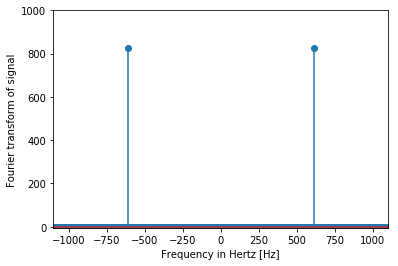

In [8]:
fft_f1 = fftpack.fft(f1)
freqs = fftpack.fftfreq(len(t)) * fs

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(fft_f1))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-fs/2, fs/2)
#ax.set_xlim(-700, 700)
ax.set_ylim(-5, 1000)
ax.set_ylabel('Fourier transform of signal')

---
*Part 9*. In python, create and plot the spectrogram of `f1` using `fftpack.fft`. Compare it with the spectrogram you saw in Praat and explain how and why it is both similar and different.

---
**Solution: We compute the spectrogram as shown below.** We can do it with our 2200 Hz sampled signal like this:

Text(0.5,0,'Time [sec]')

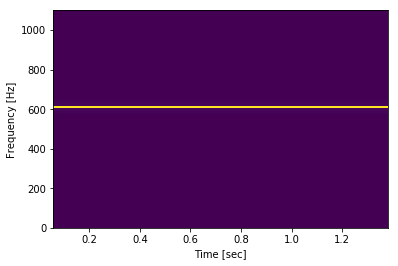

In [9]:
freq_spec_f1,t_spec_f1, Sxx_f1 = signal.spectrogram(f1,fs)
plt.pcolormesh(t_spec_f1, freq_spec_f1, Sxx_f1)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

We can also do this for the Praat audio file we read in, too, as shown below. Note that the frequency axis goes up way higher. Why is that?

Text(0.5,0,'Time [sec]')

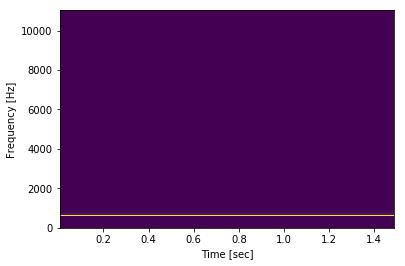

In [10]:
freq_spec_f1_praat,t_spec_f1_praat, Sxx_f1_praat = signal.spectrogram(f1_praat,sr_praat)
plt.pcolormesh(t_spec_f1_praat, freq_spec_f1_praat, Sxx_f1_praat)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Either way, the spectrograms show a yellow band at 610 Hz. This is similar to what we see in Praat with a couple differences. First, we had a wide-band spectrogram in Praat, so the dark energy band around 610 Hz had a width of almost 1200 Hz! We can see that the spectrograms we've computed here have a much narrower energy band---we've got a narrower-band spectrogram being computed. In addition, note that we are using color-scale heatmaps for our Python spectrogram. The dark band in Praat corresponds to the light yellow band in Python.

If we follow the [elegant scipy code](https://www.safaribooksonline.com/library/view/elegant-scipy/9781491922927/ch04.html), we end up with this for the 2200 Hz sampled signal:

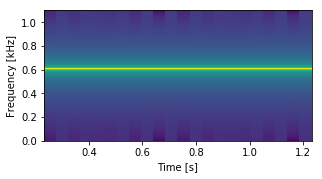

In [11]:
from skimage import util

M = 1024

freq_spec_f1_es,t_spec_f1_es, Sxx_f1_es = signal.spectrogram(f1,fs, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(t_spec_f1_es, freq_spec_f1_es / 1000, 10 * np.log10(Sxx_f1_es), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');


Overall, this doesn't look much different from our "default" spectrogram settings. Differences would be more apparent if we had complex waves, with the complex wave varying over time, e.g., like in typical conversational speech.

---

## Problem 2: The vowel [i]

*Part 1*. In Praat, use `New > Sound > Create Sound from VowelEditor` to create an audio file that is the vowel [i], with a duration of 1.5 seconds. Name your file `i.wav` and make sure to include it in `supp/`.

**Solution:** See `i.wav` in `supp/`. I can load it in and listen to it using the `Audio` command, too:

In [12]:
i_praat, sr_praat = librosa.load("supp/i.wav", sr = None)
# Or use scipy.io: 
# i_praat, sr_praat = wavfile.read("supp/i.wav")

print("The sampling rate of i.wav is:", sr_praat, "Hz.")

display(Audio(data=i_praat,rate = sr_praat))

The sampling rate of i.wav is: 44100 Hz.


*Part 2*. In Praat, determine the period and the fundamental frequency of `i` off of the waveform. Does this match what you see with the blue line f0 contour? It should. If not, explain why. Take a screenshot showing how you determined the period off of the waveform (it should show you determining the duration of one cycle of the waveform). Save the screenshot as `i-wave.png` or some other image file, e.g., `i-wave.jpg`, `i-wave.gif`, and include it in your jupyter notebook.

**Solution:** Here's a screenshot of determining the period off of the waveform:

![Screenshot of period determination of f1](supp/i-wave.png)

Note that off of the waveform, we estimate the period of `i` to be about 140 Hz. This matches the blue line from Praat's f0 estimation.

*Part 3.* In Praat, take the spectrum of `i` over a portion of the signal, approximately 10 cycles. Determine the f0 of the signal using the spectrum, and explain how you did it. How far apart are adjacent spectral peaks from each other? Why is the envelope of the spectrum the way it is, i.e., the curve you can trace by following along the top line of the spectral peaks? Estimate the frequencies of the formants F1 and F2 off of the spectrum, and explain how you did that.

---
**Solution:** This is not a pure tone, so there will be more than a single component frequency! But we can still estimate f0 off of the spectrum by checking the spacing between adjacent peaks in the spectrum. This is about 140 Hz, as expected.

![Spectrum of i, adjacent peaks](supp/i-spectrum-f0.png)


The envelope of the spectrum is shown below, giving estimates of F1 = 280 Hz and F2 = 2240 Hz, where we see peaks in the envelope. The harmonics around these frequencies get boosted because they are close to the natural resonances of the vocal tract configuration for the vowel [i]. We could estimate those resonances by modeling the vocal tract as a multitube Helmholtz resonator.

![Spectrum of i](supp/i-spectrum.png)


*Part 4*. In Praat, examine the spectrogram of `i`, at Praat's default settings for spectrograms. Explain why the spectrogram looks the way it does. Now change the spectrogram settings to have a window length of `0.5`. Explain why the spectrogram looks the way it does now.

---
**Solution:** At default settings, we get a wide-band spectrogram. With a window length of `0.5`, we get a narrow-band spectrogram. If we have a longer time window, we get better frequency resolution. This is the inverse relation between time and frequency.

---


*Part 5*. In python, read in `i.wav` using `librosa`, without changing the original sampling rate of the file. What is the sampling rate of the file?


**Solution:** We already showed how to do this in Part 1, but let's repeat that code here:

In [13]:
i_praat, sr_praat = librosa.load("supp/i.wav", sr = None)
# Or use scipy.io: 
# i_praat, sr_praat = wavfile.read("supp/i.wav")

print("The sampling rate of i.wav is:", sr_praat, "Hz.")


The sampling rate of i.wav is: 44100 Hz.


We also want to downsample the audio file to 8000 Hz to speed up the computation of the spectrum/spectrogram later. If you can't do this with librosa, then go ahead and do this in Praat and then load in that file. If you look at the `help` for `librosa.resample`, you'll notice that there's a parameter you can set called `fix`. Take a look at what that does. It affects the number of samples you end up with in the resampled signal.

In [14]:
help(librosa.resample)


i_praat_8000 = librosa.resample(y=i_praat, orig_sr = sr_praat, target_sr = 8000, fix = False)
# Or just resample in Praat and then load that resampled file in.
print("i_praat_8000 has a length of N=", len(i_praat_8000),".")

Help on function resample in module librosa.core.audio:

resample(y, orig_sr, target_sr, res_type='kaiser_best', fix=True, scale=False, **kwargs)
    Resample a time series from orig_sr to target_sr
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,) or shape=(2, n)]
        audio time series.  Can be mono or stereo.
    
    orig_sr : number > 0 [scalar]
        original sampling rate of `y`
    
    target_sr : number > 0 [scalar]
        target sampling rate
    
    res_type : str
        resample type (see note)
    
        .. note::
            By default, this uses `resampy`'s high-quality mode ('kaiser_best').
    
            To use a faster method, set `res_type='kaiser_fast'`.
    
            To use `scipy.signal.resample`, set `res_type='scipy'`.
    
    fix : bool
        adjust the length of the resampled signal to be of size exactly
        `ceil(target_sr * len(y) / orig_sr)`
    
    scale : bool
        Scale the resampled signal so that `y` and `y_ha

---
*Part 6*. In python, plot `i` and set the x-limits so that you can determine the period of `i` off of the plot. See that this period measurement matches your answers above.

---
**Solution:** Common tricky bit here is making sure that your vector of sampled points (your timepoint values) and your signal values (`i_praat_8000`) are the same length! They may be off by one, depending on rounding in converting the number of samples into an integer, so you may need to play with that.  Also, recall that I suggested taking an excerpt of the signal, from 0.5 to 1s, to reduce the time for computation. So let's do that, too.

The number of samples is 12000 samples.
Indices for signal fragment run from 4000 to 8000


<Container object of 3 artists>

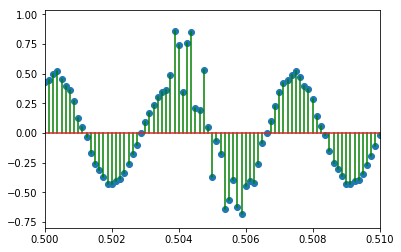

In [80]:
fs_i = 8000 # Set up 2200 Hz sampling rate
t_start = 0; t_stop = 1.5 # 0 to 1.5 seconds
t = np.linspace(t_start, t_stop, int(fs_i*(t_stop-t_start)), endpoint=False)
print("The number of samples is", len(t), "samples.")

# Now take excerpt of the signal from 0.5-1s.
ind_start = int(0.5*fs_i) # index at 0.5 s
ind_stop = int(1*fs_i) # index at 1 s

print("Indices for signal fragment run from", ind_start, "to", ind_stop)

plt.figure("Plot of i") # Create a new figure
#plt.plot(t[ind_start:ind_stop], i_praat_8000[ind_start:ind_stop], "-g") 
plt.xlim(0.5,0.51)
plt.stem(t[ind_start:ind_stop], i_praat_8000[ind_start:ind_stop], "-g") 


Note that there are some sampled points that look like they are too high or too low! This is probably related to the windowing used for resampling, or other aspects in the algorithm for resampling implemented.  Still, we can see that the nadirs between two cycles is somewhere around $t=0.502$ and $t=0.509$. So we can calculate the period estimate as follows:

In [16]:
T_i = 0.509-0.502

print("The estimated period is", T_i, "seconds.")
print("The estimated f0 is", 1/T_i, "Hz.")

The estimated period is 0.007000000000000006 seconds.
The estimated f0 is 142.85714285714272 Hz.


---
*Part 7*. In python, create an Audio object from the defined `i` signal and play it. Does it sound like your Praat f1 sound object?

---
**Solution:** Even the downsampled version still sounds similar to the original.

In [17]:
display(Audio(data=i_praat_8000,rate = fs_i))

---
*Part 8*. In python, create and plot the spectrum of `i` using `fftpack.fft`. Compare it with the spectrum you saw in Praat and explain how and why it is both similar and different.

---
**Solution:** We'll work with just the excerpt from 0.5 to 1 s again.

Text(0,0.5,'F2 in [i] signal')

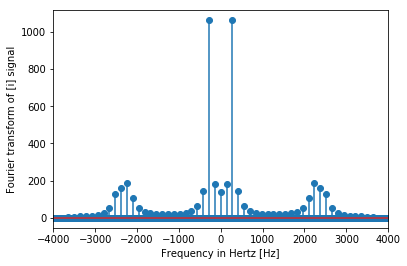

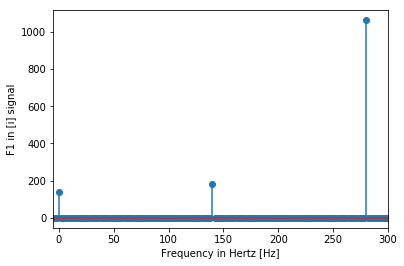

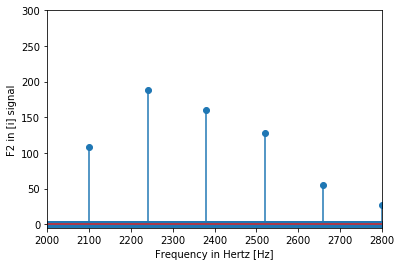

In [81]:
fft_i = fftpack.fft(i_praat_8000[ind_start:ind_stop])
freqs = fftpack.fftfreq(len(t[ind_start:ind_stop])) * fs_i

# Full spectrum up to Nyquist frequency

fig_i, ax_i = plt.subplots()
ax_i.stem(freqs, np.abs(fft_i))
ax_i.set_xlabel('Frequency in Hertz [Hz]')
ax_i.set_ylabel('Magnitude')
ax_i.set_xlim(-fs_i/2, fs_i/2)
ax_i.set_ylabel('Fourier transform of [i] signal')

# Zoom in on F1
fig_i2, ax_i2 = plt.subplots()
ax_i2.stem(freqs, np.abs(fft_i))
ax_i2.set_xlabel('Frequency in Hertz [Hz]')
ax_i2.set_ylabel('Magnitude')
#ax_i2.set_xlim(-fs_i/2, fs_i/2)
ax_i2.set_xlim(-5, 300)
ax_i2.set_ylabel('F1 in [i] signal')

# Zoom in on F2
fig_i3, ax_i3 = plt.subplots()
ax_i3.stem(freqs, np.abs(fft_i))
ax_i3.set_xlabel('Frequency in Hertz [Hz]')
ax_i3.set_ylabel('Magnitude')
#ax_i2.set_xlim(-fs_i/2, fs_i/2)
ax_i3.set_xlim(2000, 2800)
ax_i3.set_ylim(-5, 300)
ax_i3.set_ylabel('F2 in [i] signal')
  


In [47]:
# Find the frequency at which amplitude is maximized, 
# i.e., find estimate for F1

freqs[np.argmax(np.abs(fft_i))]


280.0

Note that the highest amplitude harmonic in the spectrum is at 280 Hz, which matches our estimate from Praat for F1. 

What about F2? Recall that f0 is 140 Hz. That means that the harmonics are 140 Hz apart. So if there's a harmonic at 2100 Hz, the next one should be at 2240 Hz. So according to our plot, our estimate for F2 is 2240 Hz, which matches our estimate from Praat.

The differences between the spectrum from Praat and the one we computed in Python again comes from log transforming (into a decibel scale), and Praat showing only positive frequencies.

---
*Part 9*. In python, create and plot the spectrogram of `i` using `fftpack.fft`. Compare it with the spectrograms you saw in Praat and explain how and why it is both similar and different.

---
**Solution:** Following the Elegant Scipy style spectrograms, we get the following narrow-band spectrogram. Note that like in Praat, we see that there are two high energy bands (the yellowish/greenish regions), close in frequencies to where we expect F1 and F2.

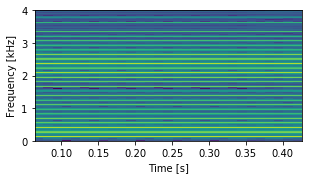

In [68]:
M = 1024

freq_spec_i,t_spec_i, Sxx_i = signal.spectrogram(i_praat_8000[ind_start:ind_stop],fs_i, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(t_spec_i, freq_spec_i / 1000, 10 * np.log10(Sxx_i), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

---
*Part 10*. Resample `i` to a sampling rate below the Nyquist rate, and explain how you chose the rate you did. Repeat steps 6-9 with the resampled signal.

---
**Solution:** From the Praat spectrum, we saw that the spectrum vanishes around 3780 Hz for the original [i] signal. If we assume that is close to the highest component frequency in the signal, then the Nyquist rate would be $2 * 3780 = 7560\, Hz$. We also already know that F2 is around 2240 Hz. So let's sample at a rate that can't recover F2, and see what happens. To recover harmonics around F2, we need to have at least 4480 Hz or so. Let's try sampling at 2000 Hz. That is still a high enough rate to pick up harmonics near F1 (around 280 Hz). 

In [84]:
i_praat_2000 = librosa.resample(y=i_praat, orig_sr = sr_praat, target_sr = 2000, fix = False)
# Or just resample in Praat and then load that resampled file in.

print("i_praat_2000 has a length of N=", len(i_praat_2000),".")

fs_i = 2000 # Set up 2000 Hz sampling rate

display(Audio(data=i_praat_2000,rate = fs_i))


i_praat_2000 has a length of N= 3000 .


Note that this doesn't quite sound like an [i] anymore! What vowel does it sound more like? Does that make sense?

Next we plot the re-sampled signal:

The number of samples is 3000 samples.
Indices for signal fragment run from 1000 to 2000


<Container object of 3 artists>

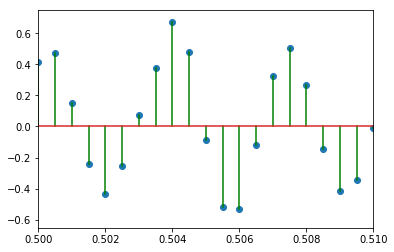

In [85]:
t_start = 0; t_stop = 1.5 # 0 to 1.5 seconds
t = np.linspace(t_start, t_stop, int(fs_i*(t_stop-t_start)), endpoint=False)
print("The number of samples is", len(t), "samples.")

# Now take excerpt of the signal from 0.5-1s.
ind_start = int(0.5*fs_i) # index at 0.5 s
ind_stop = int(1*fs_i) # index at 1 s

print("Indices for signal fragment run from", ind_start, "to", ind_stop)

plt.figure("Plot of i") # Create a new figure
#plt.plot(t[ind_start:ind_stop], i_praat_8000[ind_start:ind_stop], "-g") 
plt.xlim(0.5,0.51)
plt.stem(t[ind_start:ind_stop], i_praat_2000[ind_start:ind_stop], "-g") 


And let's plot the spectrum. Note: you may notice that the code below is identical to the code for the 8000 Hz signal, except that we replace the variable name `i_praat_8000` with `i_praat_5000`. If you notice this kind of redundancy you should really be writing a function instead of copying and pasting code! If you don't know how to do this, ask us!

Text(0,0.5,'F2 in [i] signal')

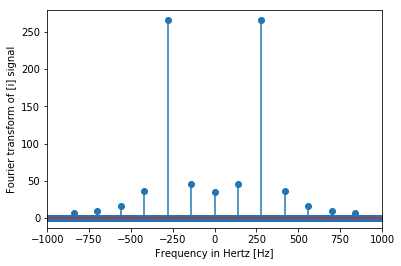

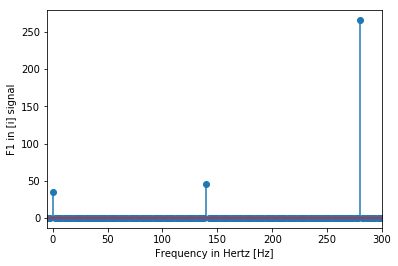

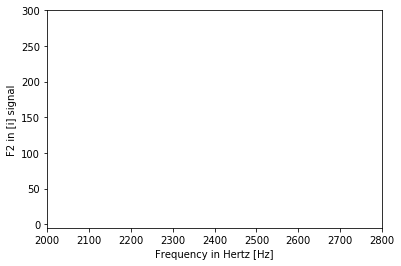

In [86]:
fft_i = fftpack.fft(i_praat_2000[ind_start:ind_stop])
freqs = fftpack.fftfreq(len(t[ind_start:ind_stop])) * fs_i

# Full spectrum up to Nyquist frequency

fig_i, ax_i = plt.subplots()
ax_i.stem(freqs, np.abs(fft_i))
ax_i.set_xlabel('Frequency in Hertz [Hz]')
ax_i.set_ylabel('Magnitude')
ax_i.set_xlim(-fs_i/2, fs_i/2)
ax_i.set_ylabel('Fourier transform of [i] signal')

# Zoom in on F1
fig_i2, ax_i2 = plt.subplots()
ax_i2.stem(freqs, np.abs(fft_i))
ax_i2.set_xlabel('Frequency in Hertz [Hz]')
ax_i2.set_ylabel('Magnitude')
#ax_i2.set_xlim(-fs_i/2, fs_i/2)
ax_i2.set_xlim(-5, 300)
ax_i2.set_ylabel('F1 in [i] signal')

# Zoom in on F2
fig_i3, ax_i3 = plt.subplots()
ax_i3.stem(freqs, np.abs(fft_i))
ax_i3.set_xlabel('Frequency in Hertz [Hz]')
ax_i3.set_ylabel('Magnitude')
#ax_i2.set_xlim(-fs_i/2, fs_i/2)
ax_i3.set_xlim(2000, 2800)
ax_i3.set_ylim(-5, 300)
ax_i3.set_ylabel('F2 in [i] signal')

Note that we are now missing frequency components above 1000 Hz. That's why the third plot is empty. 

Let's compute a spectrogram. Note that now, although we see the higher energy components at the harmonics, 140 Hz apart (the harmonics are resolved in this narrow-band spectrogram), we don't see the yellow band up around 2240 Hz---the y-axis only goes up to 1 kHz or 1000 Hz, in fact. 

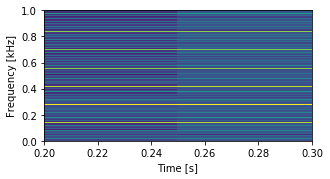

In [93]:
M = 800

freq_spec_i2,t_spec_i2, Sxx_i2 = signal.spectrogram(i_praat_2000[ind_start:ind_stop],fs_i, window='hanning',
                                      nperseg=800, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(t_spec_i2, freq_spec_i2 / 1000, 10 * np.log10(Sxx_i2), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');